In [2]:
import itertools
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')
set_matplotlib_formats('svg')

%load_ext autoreload
%autoreload 2
import util

# Decoding analyses

We first aggregate and plot mean-average-rank statistics for each decoder.

In [3]:
models = {
#     "GloVe": "baseline",
#     "ConvS2S": "fairseq.wmt14.en-fr.fconv",
#     "InferSent": "infersent.allnli",
#     "IMDB": "imdbsentiment",
#     "skipthought": "skipthought",
#     "DisSent": "dissent.books8.epoch9",
#     "order": "order-embeddings",
#     "ELMo": "elmo.2x4096",
#     "BERT": "bert.base",
# #     "BERT Large": "bert.base-large",
#     "BERT-MRPC": "bert.base.finetune-MRPC",
#     "BERT-CoLA": "bert.base.finetune-CoLA",
#     "BERT-MNLI": "bert.base.finetune-MNLI",
#     "BERT-RTE": "bert.base.finetune-RTE",
#     "BERT-SST": "bert.base.finetune-SST",
#     "BERT-WNLI": "bert.base.finetune-WNLI",
#     "BERT-QQP": "bert.base.finetune-QQP",
#     "BERT-SNLI": "bert.base.finetune-SNLI",
#     "openai": "transformer.roc",
    
    "BERT": "bert.base",
#     "BERT Large": "bert.base-large",
    "BERT-MRPC": "bert.base.finetune-5000-MRPC",
    "BERT-CoLA": "bert.base.finetune-5000-CoLA",
    "BERT-MNLI": "bert.base.finetune-5000-MNLI",
    "BERT-RTE": "bert.base.finetune-5000-RTE",
    "BERT-SST": "bert.base.finetune-5000-SST",
    "BERT-WNLI": "bert.base.finetune-5000-WNLI",
    "BERT-QQP": "bert.base.finetune-5000-QQP",
    "BERT-SNLI": "bert.base.finetune-5000-SNLI",
}

In [4]:
stats = {}

--------

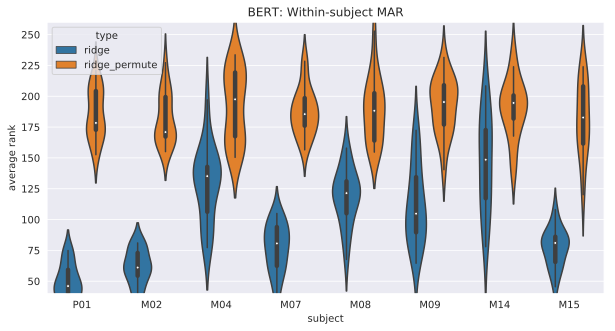

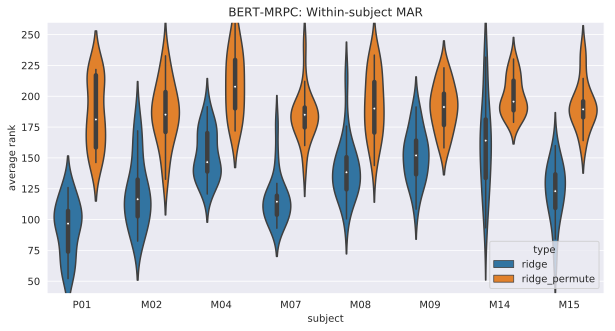

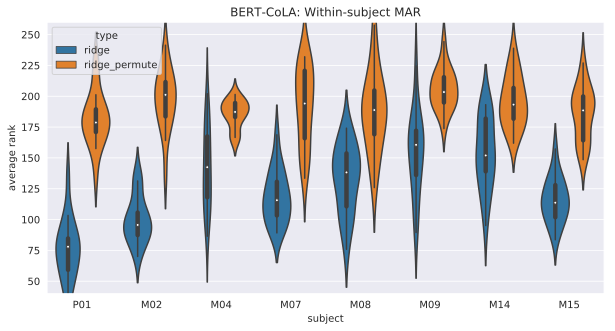

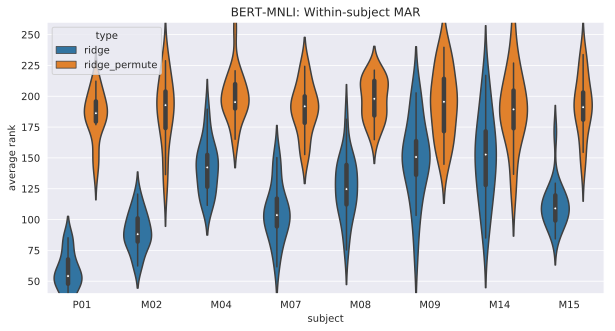

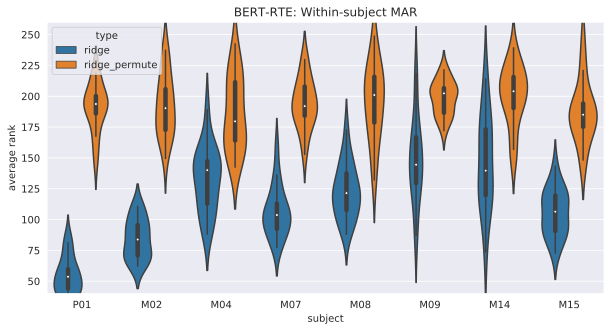

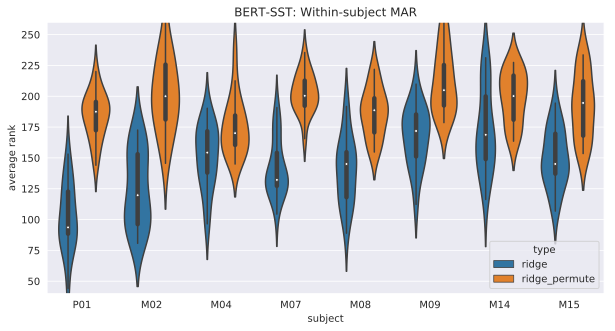

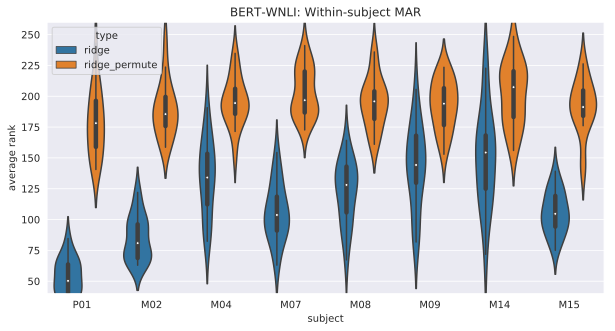

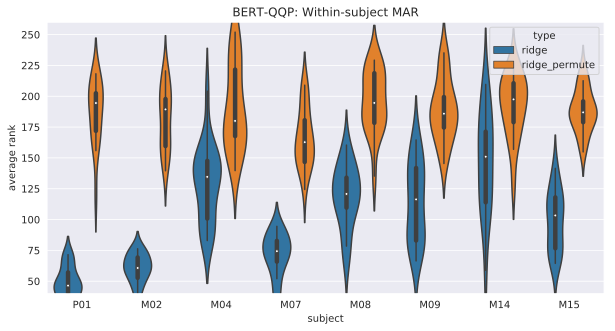

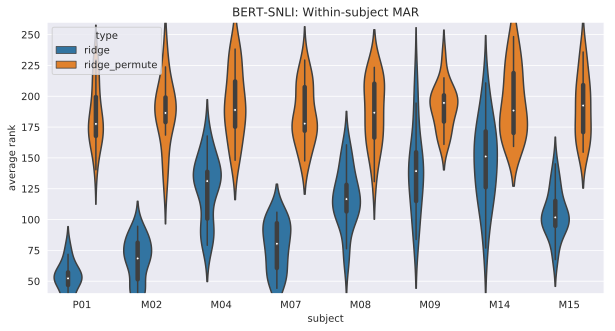

In [35]:
for model, path in models.items():
    f, ax = plt.subplots(figsize=(10,5))
    try:
        stats[model] = util.load_decoding_perf(model, "perf.384sentences.%s.csv" % path, ax=ax)
    except: raise

In [43]:
stats["BERT-CoLA"]

P01         M02         M04         M07  \
type                                                                 
ridge         mean   76.013228   99.769841  141.383598  118.103175   
              sem     5.634551    4.469637    7.806405    5.060565   
ridge_permute mean  181.698413  197.230159  185.656085  192.034392   
              sem     5.231268    5.783317    2.655097    7.421412   

                           M08         M09         M14         M15  
type                                                                
ridge         mean  132.994709  153.888889  153.835979  115.642857  
              sem     6.467276    7.793541    6.839636    4.307348  
ridge_permute mean  187.431217  205.634921  195.727513  185.992063  
              sem     7.620815    3.952267    4.954483    5.153884

-----

# Pairwise statistical tests

We'll calculate which model pair differences in performance are significant by the Wilcoxon test on the original sentence-rank data. (The data graphed above are all computed from MAR statistics (meaned across sentences).)

In [67]:
# Aggregate statistics.
f = pd.concat(stats, names=["target", "metric", "stat"]).reset_index()

In [68]:
f.head()

,target,metric,stat,P01,M02,M04,M07,M08,M09,M14,M15
0,BERT,ridge,mean,48.703704,61.005291,129.359788,76.989418,118.492063,111.478836,146.555556,77.224868
1,BERT,ridge,sem,3.512983,3.432833,7.226109,4.575689,5.369849,7.498580,9.325991,3.653820
2,BERT,ridge_permute,mean,185.690476,181.613757,191.584656,187.447090,189.187831,192.084656,190.251323,181.079365
3,BERT,ridge_permute,sem,4.823489,4.902117,6.917099,4.524329,6.201333,5.375544,5.617909,7.024542
4,BERT-CoLA,ridge,mean,76.013228,99.769841,141.383598,118.103175,132.994709,153.888889,153.835979,115.642857


In [69]:
f = pd.melt(f, id_vars=["target", "metric", "stat"],
            var_name="subject", value_name="value")
f.head()

,target,metric,stat,subject,value
0,BERT,ridge,mean,P01,48.703704
1,BERT,ridge,sem,P01,3.512983
2,BERT,ridge_permute,mean,P01,185.690476
3,BERT,ridge_permute,sem,P01,4.823489
4,BERT-CoLA,ridge,mean,P01,76.013228


In [70]:
wilcoxon_results = util.wilcoxon_rank_preds(models)
wilcoxon_results.head()

w_stat          p_val  p_val_corrected
model1 model2                                              
BERT   BERT-MRPC  1337498.0   3.621127e-78     1.005869e-79
       BERT-CoLA  1332364.0   3.676781e-80     1.021328e-81
       BERT-MNLI  1508554.5   5.473344e-51     1.520373e-52
       BERT-RTE   1464065.0   4.111337e-55     1.142038e-56
       BERT-SST   1161078.5  1.626612e-114    4.518366e-116

In [71]:
wilcoxon_results["significant_bonferroni"] = wilcoxon_results["p_val_corrected"] < 0.01
wilcoxon_results.sort_values("p_val")

w_stat          p_val  p_val_corrected  \
model1    model2                                                 
BERT      BERT-SST   1161078.5  1.626612e-114    4.518366e-116   
BERT-SST  BERT-QQP   1225281.5  2.785005e-100    7.736125e-102   
          BERT-SNLI  1332856.5   1.838409e-82     5.106691e-84   
BERT      BERT-CoLA  1332364.0   3.676781e-80     1.021328e-81   
          BERT-MRPC  1337498.0   3.621127e-78     1.005869e-79   
BERT-MRPC BERT-QQP   1412103.5   1.962470e-66     5.451306e-68   
BERT-CoLA BERT-QQP   1444245.0   9.956298e-61     2.765638e-62   
BERT      BERT-RTE   1464065.0   4.111337e-55     1.142038e-56   
          BERT-MNLI  1508554.5   5.473344e-51     1.520373e-52   
          BERT-WNLI  1506515.5   3.619594e-50     1.005443e-51   
BERT-SST  BERT-WNLI  1556661.5   2.132755e-49     5.924318e-51   
BERT-RTE  BERT-SST   1556576.5   1.511326e-47     4.198127e-49   
BERT-MRPC BERT-SNLI  1547112.5   2.849298e-47     7.914715e-49   
BERT-MNLI BERT-QQP   1551044.0   1.032279e-43     2.867442e-45   
BERT-CoLA BERT-SNLI  1627086.0   2.397483e-36     6.659675e-38   
BERT-RTE  BERT-QQP   1631830.0   1.179180e-35     3.275499e-37   
BERT-MNLI BERT-SST   1665908.0   1.335938e-35     3.710938e-37   
BERT-WNLI BERT-QQP   1654245.5   4.223132e-33     1.173092e-34   
BERT-MNLI BERT-SNLI  1689485.0   9.243657e-28     2.567682e-29   
BERT-MRPC BERT-RTE   1763153.0   7.924736e-24     2.201316e-25   
          BERT-WNLI  1770540.0   2.933968e-23     8.149912e-25   
BERT-CoLA BERT-SST   1870885.5   6.012594e-16     1.670165e-17   
BERT-MRPC BERT-MNLI  1862986.5   9.365778e-16     2.601605e-17   
BERT-CoLA BERT-WNLI  1840741.0   2.264286e-15     6.289683e-17   
BERT-RTE  BERT-SNLI  1848704.0   5.645375e-15     1.568160e-16   
BERT-WNLI BERT-SNLI  1876001.0   3.205058e-13     8.902938e-15   
BERT-CoLA BERT-RTE   1905319.5   3.130901e-12     8.696947e-14   
BERT      BERT-SNLI  1874531.0   3.847385e-11     1.068718e-12   
BERT-CoLA BERT-MNLI  2014689.0   1.368681e-06     3.801890e-08   
BERT-QQP  BERT-SNLI  1969155.5   9.888008e-06     2.746669e-07   
BERT-MRPC BERT-SST   2049637.0   1.969825e-05     5.471736e-07   
          BERT-CoLA  2072387.5   1.341371e-04     3.726030e-06   
BERT-MNLI BERT-WNLI  2070515.0   1.688460e-03     4.690165e-05   
BERT      BERT-QQP   2015533.0   2.507719e-03     6.965886e-05   
BERT-MNLI BERT-RTE   2079500.0   3.517973e-03     9.772146e-05   
BERT-RTE  BERT-WNLI  2179500.0   4.317066e-01     1.199185e-02   

                     significant_bonferroni  
model1    model2                             
BERT      BERT-SST                     True  
BERT-SST  BERT-QQP                     True  
          BERT-SNLI                    True  
BERT      BERT-CoLA                    True  
          BERT-MRPC                    True  
BERT-MRPC BERT-QQP                     True  
BERT-CoLA BERT-QQP                     True  
BERT      BERT-RTE                     True  
          BERT-MNLI                    True  
          BERT-WNLI                    True  
BERT-SST  BERT-WNLI                    True  
BERT-RTE  BERT-SST                     True  
BERT-MRPC BERT-SNLI                    True  
BERT-MNLI BERT-QQP                     True  
BERT-CoLA BERT-SNLI                    True  
BERT-RTE  BERT-QQP                     True  
BERT-MNLI BERT-SST                     True  
BERT-WNLI BERT-QQP                     True  
BERT-MNLI BERT-SNLI                    True  
BERT-MRPC BERT-RTE                     True  
          BERT-WNLI                    True  
BERT-CoLA BERT-SST                     True  
BERT-MRPC BERT-MNLI                    True  
BERT-CoLA BERT-WNLI                    True  
BERT-RTE  BERT-SNLI                    True  
BERT-WNLI BERT-SNLI                    True  
BERT-CoLA BERT-RTE                     True  
BERT      BERT-SNLI                    True  
BERT-CoLA BERT-MNLI                    True  
BERT-QQP  BERT-SNLI                    True  
BERT-MRPC BERT-SST                     True

---------

# Aggregate graphs

In [72]:
f_mean = f[(f.metric == "ridge") & (f.stat == "mean")].sort_values(["target"])

## Decoding analysis

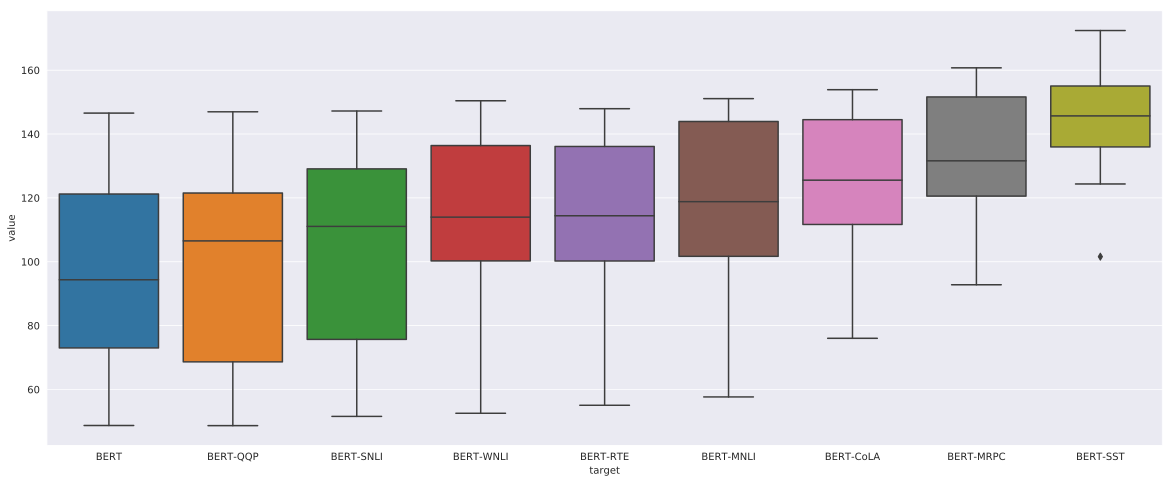

In [73]:
fig, ax = plt.subplots(figsize=(20, 8))
target_order = f_mean.groupby("target").value.mean().argsort()
sns.boxplot(x="target", y="value", data=f_mean,
            ax=ax, order=target_order.index[target_order])

In [74]:
f_mean.groupby("target").mean()

,value
target,
BERT,96.226190
BERT-CoLA,123.954034
BERT-MNLI,116.659061
BERT-MRPC,132.339616
BERT-QQP,98.552249
BERT-RTE,112.639881
BERT-SNLI,103.977844
BERT-SST,143.467593
BERT-WNLI,112.281746


[-0.4  0.6  1.6  2.6  3.6  4.6  5.6  6.6  7.6  0. ]


Text(0.87,-0.07,'* = p<0.01 for Bonferroni-corrected two-sided Wilcoxon test')

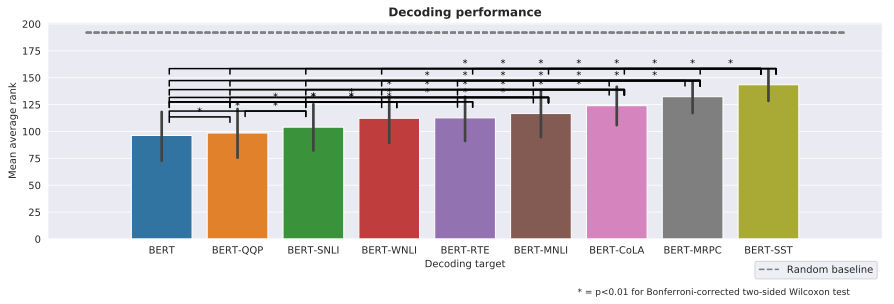

In [75]:
fig, ax = plt.subplots(figsize=(15,4))
sns.barplot(x="target", y="value", order=target_order.index[target_order], data=f_mean)
plt.xlabel("Decoding target")
plt.ylabel("Mean average rank")
plt.title("Decoding performance", weight="bold")

# Plot baseline
import matplotlib
bars = [child for child in ax.get_children() if isinstance(child, matplotlib.patches.Rectangle)]
baselines_start = np.array([plt.getp(item, "x") for item in bars])
baselines_end = baselines_start + np.array([plt.getp(item, "width") for item in bars])
print(baselines_start)
plt.hlines(np.repeat(384 / 2, len(target_order)), -1, len(target_order), colors="gray", linestyles="dashed", label="Random baseline")

# Plot legend
plt.legend(loc='upper right', bbox_to_anchor=(1, -0.08))

# Plot significant differences
xticks = list(zip(*plt.xticks()))
xticks = {label.get_text(): (pos, label) for pos, label in xticks}
mean_results = f_mean.groupby("target").value.mean()
for (m1, m2), row in wilcoxon_results.iterrows():
    significant = row.significant_bonferroni
            
    m1_pos, _ = xticks[m1]
    m2_pos, _ = xticks[m2]
    
    if significant:
        y = max(mean_results[m1], mean_results[m2]) + 10
        h = 5
        col = 'k'
        plt.plot([m1_pos + 0.1, m1_pos + 0.1, m2_pos - 0.1, m2_pos - 0.1], [y, y + h, y + h, y], lw=1.5, c=col)
        plt.text((m1_pos+m2_pos)*.5, y + h, "*", ha='center', va='bottom', color=col)
        
plt.figtext(0.87, -0.07, "* = p<0.01 for Bonferroni-corrected two-sided Wilcoxon test", wrap=True, horizontalalignment='right', fontsize=9)

Text(0.5,1,'Decoding performance between subjects')

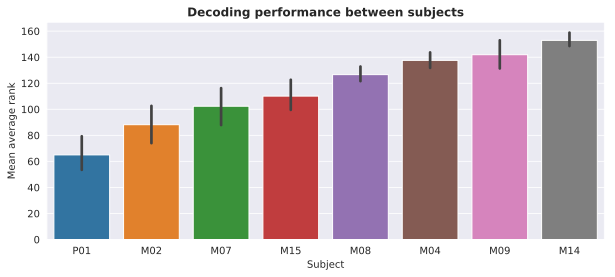

In [76]:
order = f_mean.groupby("subject").value.agg("mean").argsort()
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x="subject", y="value", order=order.index[order], data=f_mean, ax=ax)
plt.xlabel("Subject")
plt.ylabel("Mean average rank")
plt.title("Decoding performance between subjects", weight="bold")

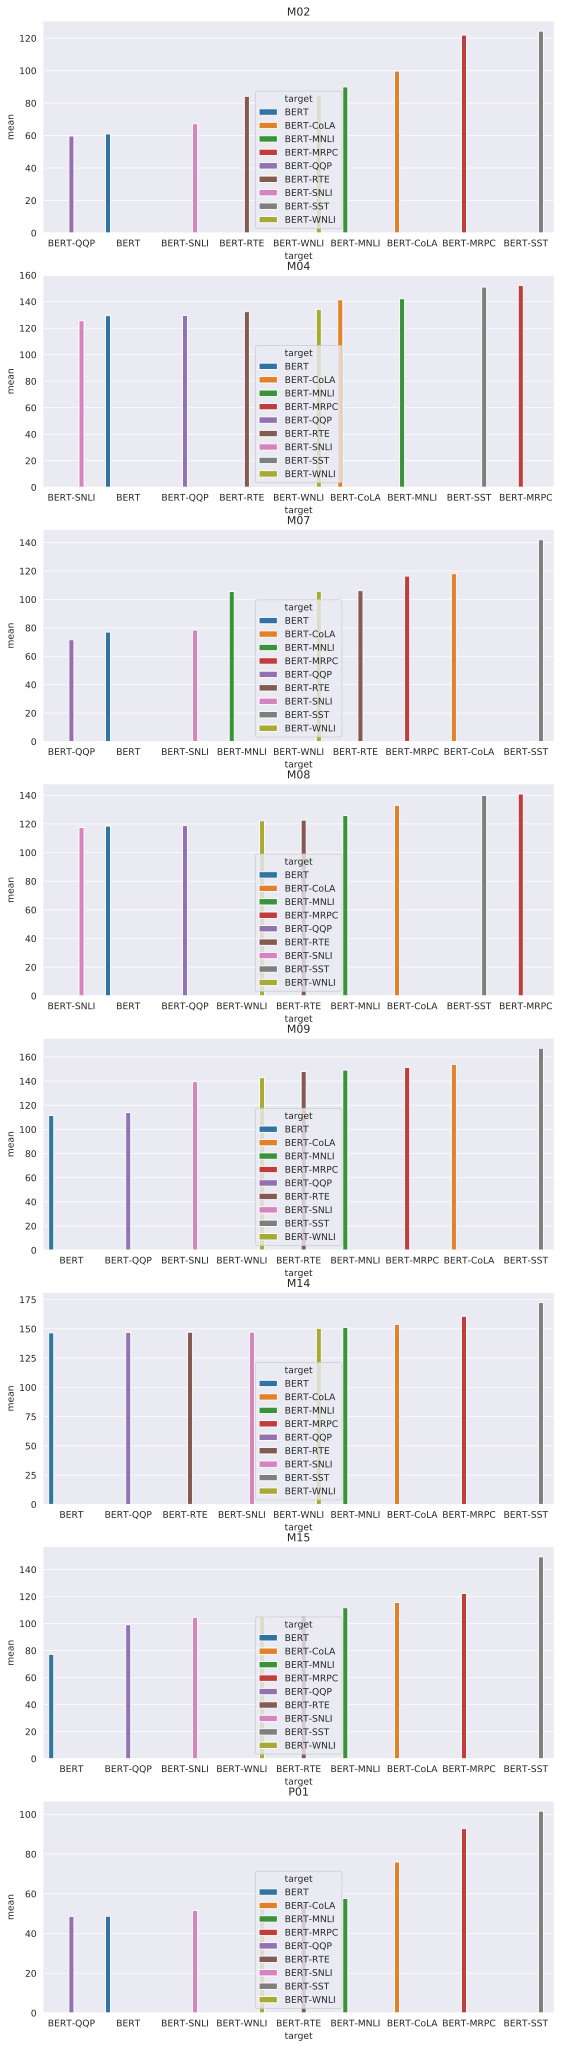

In [120]:
n_subjects = len(f_sub.subject.unique())
fig, axs = plt.subplots(n_subjects, 1, figsize=(10, 5 * n_subjects))
for ax, (subj, subj_data) in zip(axs, f[f.metric == "ridge"].groupby("subject")):
    subj_data = subj_data.set_index("stat").sort_index()
    subj_data = pd.pivot_table(subj_data, index=["target"], columns="stat")
    subj_data.columns = subj_data.columns.get_level_values(1)
    order = subj_data["mean"].argsort()
    sns.barplot(x="target", y="mean", data=subj_data.reset_index(), hue="target", order=order.index[order], ax=ax)
    ax.set_title(subj)
    
    # TODO plot yerr